## Data Preparation and Transformation

### Dataset Prep and Encoding

In [ ]:
pip install --upgrade scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.23.2)


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving TelcoChurn.csv to TelcoChurn (1).csv


In [ ]:
# We will now be importing some required libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io

#Loading the dataset
#Changing the values of ' ' to null
dataset = pd.read_csv(io.StringIO(uploaded['TelcoChurn.csv'].decode('utf-8')), na_values=' ')

X = dataset.iloc[:,1:20].values
y = dataset.iloc[:,20].values

#Since ' ' in X[:,18] is now set as null values, change data type to float64
X[:,18] = np.array(X[:,18], dtype=np.float64)

#Dealing with missing values
#I used the two numerical columns, ('MonthlyCharges' and 'TotalCharges') to impute the missing values in 'TotalCharges'
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:,[17,18]])
X[:,17:19]= imputer.transform(X[:,17:19])
    
#Dealing with categorical variables
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

#One Hot Encode 'Gender'
col_trans = make_column_transformer((OneHotEncoder(), [0]), remainder='passthrough')
X = col_trans.fit_transform(X)
X = np.delete(X,0,1)
#One Hot Encode 'Partner'
col_trans = make_column_transformer((OneHotEncoder(), [2]), remainder='passthrough')
X = col_trans.fit_transform(X)
X = np.delete(X,0,1)
#One Hot Encode 'Dependent'
col_trans = make_column_transformer((OneHotEncoder(), [3]), remainder='passthrough')
X = col_trans.fit_transform(X)
X = np.delete(X,0,1)
#One Hot Encode 'PhoneService'
col_trans = make_column_transformer((OneHotEncoder(), [5]), remainder='passthrough')
X = col_trans.fit_transform(X)
X = np.delete(X,0,1)
#One Hot Encode 'MultipleLines'
col_trans = make_column_transformer((OneHotEncoder(), [6]), remainder='passthrough')
X = col_trans.fit_transform(X)
X = np.delete(X,0,1)
#One Hot Encode 'InternetService'
col_trans = make_column_transformer((OneHotEncoder(), [8]), remainder='passthrough')
X = col_trans.fit_transform(X)
X = np.delete(X,0,1)
#One Hot Encode 'OnlineSecurity'
col_trans = make_column_transformer((OneHotEncoder(), [10]), remainder='passthrough')
X = col_trans.fit_transform(X)
X = np.delete(X,0,1)
#One Hot Encode 'OnlineBackup'
col_trans = make_column_transformer((OneHotEncoder(), [12]), remainder='passthrough')
X = col_trans.fit_transform(X)
X = np.delete(X,0,1)
#One Hot Encode 'DeviceProtection'
col_trans = make_column_transformer((OneHotEncoder(), [14]), remainder='passthrough')
X = col_trans.fit_transform(X)
X = np.delete(X,0,1)
#One Hot Encode 'TechSupport'
col_trans = make_column_transformer((OneHotEncoder(), [16]), remainder='passthrough')
X = col_trans.fit_transform(X)
X = np.delete(X,0,1)
#One Hot Encode 'StreamingTV'
col_trans = make_column_transformer((OneHotEncoder(), [18]), remainder='passthrough')
X = col_trans.fit_transform(X)
X = np.delete(X,0,1)
#One Hot Encode 'StreamingMovies'
col_trans = make_column_transformer((OneHotEncoder(), [20]), remainder='passthrough')
X = col_trans.fit_transform(X)
X = np.delete(X,0,1)
#One Hot Encode 'Contract'
col_trans = make_column_transformer((OneHotEncoder(), [22]), remainder='passthrough')
X = col_trans.fit_transform(X)
X = np.delete(X,0,1)
#One Hot Encode 'PaperlessBilling'
col_trans = make_column_transformer((OneHotEncoder(), [24]), remainder='passthrough')
X = col_trans.fit_transform(X)
X = np.delete(X,0,1)
#One Hot Encode 'PaymentMethod'
col_trans = make_column_transformer((OneHotEncoder(), [25]), remainder='passthrough')
X = col_trans.fit_transform(X)
X = np.delete(X,0,1)


#Encoding Class Label 'Churn'
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

### Applying Undersampling and Oversampling techniques to the Original X & y

In [ ]:
from collections import Counter

import sys
!{sys.executable} -m pip install -U imbalanced-learn
#Class Label Counts prior to any sampling:
print('Regularly Sampled class label counts: ', sorted(Counter(y).items()))

#Undersampling for a balanced dataset
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_under, y_under = rus.fit_resample(X, y)
print('Class label counts after undersample: ', sorted(Counter(y_under).items()))

#Oversampling for a balanced dataset
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_over, y_over = ros.fit_resample(X, y)
print('Class label counts after oversample: ',sorted(Counter(y_over).items()))

     |████████████████████████████████| 174kB 22.4MB/s 
  Found existing installation: imbalanced-learn 0.4.3
    Uninstalling imbalanced-learn-0.4.3:
      Successfully uninstalled imbalanced-learn-0.4.3
Regularly Sampled class label counts:  [(0, 5174), (1, 1869)]
Class label counts after undersample:  [(0, 1869), (1, 1869)]
Class label counts after oversample:  [(0, 5174), (1, 5174)]


In [ ]:
#Splitting the data into Training Set and Test Set: Regularly Sampled
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
#Splitting the data into Training Set and Test Set: Undersampled
from sklearn.model_selection import train_test_split
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under,y_under,test_size=0.3,random_state=0)
#Splitting the data into Training Set and Test Set: Oversampled
from sklearn.model_selection import train_test_split
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over,y_over,test_size=0.3,random_state=0)

#Normalizing the features: Regularly Sampled
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
#Normalizing the features: Undersampled
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train_under = sc_X.fit_transform(X_train_under)
X_test_under = sc_X.transform(X_test_under)
#Normalizing the features: Oversampled
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train_over = sc_X.fit_transform(X_train_over)
X_test_over = sc_X.transform(X_test_over)

### PCA Dimension Reduction

#### PCA dimension reduction with optimum N components on Regularly Sampled X & y

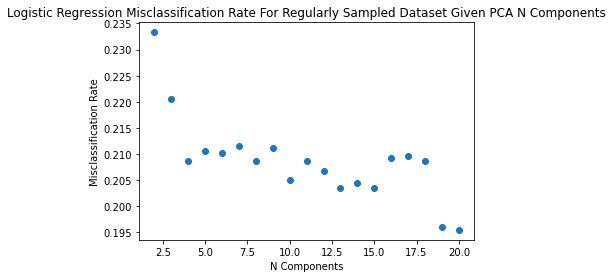

Best PCA N components by misclassification rate for regularly sampled dataset: n_components = 20 misclassification rate = 0.19545669663984855


In [ ]:
#PCA
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

#Hiding irrelevant FutureWarning messages
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pairs = []
best_classification = []

#Running PCA on regularly sampled dataset with n components between 2 and 20
for i in range(2,21,1):
    pcaObj = PCA(n_components=i)
    pca_X_train = pcaObj.fit_transform(X_train)
    pca_X_test = pcaObj.transform(X_test)
    
    #Comparing Logistic Regression performance with each n components
    classifierObj = LogisticRegression(random_state=0)
    classifierObj.fit(pca_X_train, y_train)

    #Predicting and saving the model's score
    misclass_rate = 1 - classifierObj.score(pca_X_test,y_test)
    pairs.append([i, misclass_rate])

    #Comparing it to other model classifications thus far
    if (i == 2):
        best_classification = [i, misclass_rate]
    elif (best_classification[1] > misclass_rate):
        best_classification = [i, misclass_rate]

#Creating a scatterplot with our regularly sampled PCA misclassification results
n_to_accuracy = np.asarray(pairs)
x, y = n_to_accuracy.T
plt.title('Logistic Regression Misclassification Rate For Regularly Sampled Dataset Given PCA N Components')
plt.xlabel('N Components')
plt.ylabel('Misclassification Rate')
plt.scatter(x, y)
plt.show()

print('Best PCA N components by misclassification rate for regularly sampled dataset:',
      'n_components =', best_classification[0],
      'misclassification rate =', best_classification[1])

#Applying PCA using optimum N Components
pcaObj = PCA(n_components=best_classification[0])
pca_X_train = pcaObj.fit_transform(X_train)
pca_X_test = pcaObj.transform(X_test)

#### PCA dimension reduction with optimum N components on Undersampled X & y

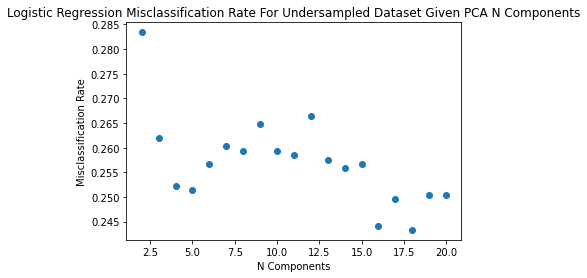

Best PCA N componets by misclassification rate for undersampled dataset: n_components = 18 misclassification rate = 0.24331550802139035


In [ ]:
pairs = []
best_classification = []

#Running PCA on undersampled dataset with n components between 2 and 20
for i in range(2,21,1):
    pcaObj = PCA(n_components=i)
    pca_X_train_under = pcaObj.fit_transform(X_train_under)
    pca_X_test_under = pcaObj.transform(X_test_under)
    
    #Comparing Logistic Regression performance with each n components
    classifierObj = LogisticRegression(random_state=0)
    classifierObj.fit(pca_X_train_under, y_train_under)

    #Predicting and saving the model's score
    misclass_rate = 1 - classifierObj.score(pca_X_test_under,y_test_under)
    pairs.append([i, misclass_rate])

    #Comparing it to other model classifications thus far
    if (i == 2):
        best_classification = [i, misclass_rate]
    elif (best_classification[1] > misclass_rate):
        best_classification = [i, misclass_rate]

#Creating a scatterplot with our regularly sampled PCA misclassification results
n_to_accuracy = np.asarray(pairs)
x, y = n_to_accuracy.T
plt.title('Logistic Regression Misclassification Rate For Undersampled Dataset Given PCA N Components')
plt.xlabel('N Components')
plt.ylabel('Misclassification Rate')
plt.scatter(x, y)
plt.show()

print('Best PCA N componets by misclassification rate for undersampled dataset:',
      'n_components =', best_classification[0],
      'misclassification rate =', best_classification[1])

#Applying PCA using optimum N Components
pcaObj = PCA(n_components=best_classification[0])
pca_X_train_under = pcaObj.fit_transform(X_train_under)
pca_X_test_under = pcaObj.transform(X_test_under)

#### PCA dimension reduction with optimum N components on Oversampled X & y

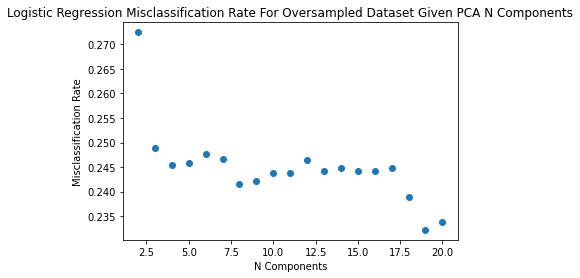

Best PCA N componets by misclassification rate for oversampled dataset: n_components = 19 misclassification rate = 0.2322061191626409


In [ ]:
pairs = []
best_classification = []

#Running PCA on oversampled dataset with n components between 2 and 20
for i in range(2,21,1):
    pcaObj = PCA(n_components=i)
    pca_X_train_over = pcaObj.fit_transform(X_train_over)
    pca_X_test_over = pcaObj.transform(X_test_over)
    
    #Comparing Logistic Regression performance with each n components
    classifierObj = LogisticRegression(random_state=0)
    classifierObj.fit(pca_X_train_over, y_train_over)

    #Predicting and saving the model's score
    misclass_rate = 1 - classifierObj.score(pca_X_test_over,y_test_over)
    pairs.append([i, misclass_rate])

    #Comparing it to other model classifications thus far
    if (i == 2):
        best_classification = [i, misclass_rate]
    elif (best_classification[1] > misclass_rate):
        best_classification = [i, misclass_rate]

#Creating a scatterplot with our regularly sampled PCA misclassification results
n_to_accuracy = np.asarray(pairs)
x, y = n_to_accuracy.T
plt.title('Logistic Regression Misclassification Rate For Oversampled Dataset Given PCA N Components')
plt.xlabel('N Components')
plt.ylabel('Misclassification Rate')
plt.scatter(x, y)
plt.show()

print('Best PCA N componets by misclassification rate for oversampled dataset:',
      'n_components =', best_classification[0],
      'misclassification rate =', best_classification[1])

#Applying PCA using optimum N Components
pcaObj = PCA(n_components=best_classification[0])
pca_X_train_over = pcaObj.fit_transform(X_train_over)
pca_X_test_over = pcaObj.transform(X_test_over)


### Kernel PCA Dimension Reduction

#### Kernel PCA dimension reduction with optimum N components on Regularly Sampled X & y

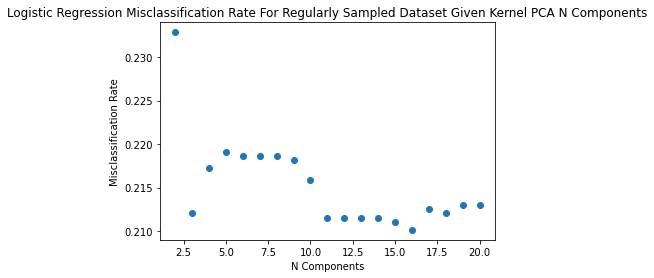

Best Kernel PCA N componets by misclassification rate for regularly sampled dataset: n_components = 16 misclassification rate = 0.2101277804070043


In [ ]:
#Kernel PCA
from sklearn.decomposition import KernelPCA

pairs = []
best_classification = []

#Running Kernel PCA on regularly sampled dataset with n components between 2 and 20
for i in range(2,21,1):
    kernelPCAObj = KernelPCA(n_components=i, kernel='rbf')
    kpca_X_train = kernelPCAObj.fit_transform(X_train)
    kpca_X_test = kernelPCAObj.transform(X_test)
    
    #Comparing Logistic Regression performance with each n components
    classifierObj = LogisticRegression(random_state=0)
    classifierObj.fit(kpca_X_train, y_train)

    #Predicting and saving the model's score
    misclass_rate = 1 - classifierObj.score(kpca_X_test,y_test)
    pairs.append([i, misclass_rate])

    #Comparing it to other model classifications thus far
    if (i == 2):
        best_classification = [i, misclass_rate]
    elif (best_classification[1] > misclass_rate):
        best_classification = [i, misclass_rate]

#Creating a scatterplot with our regularly sampled Kernel PCA misclassification results
n_to_accuracy = np.asarray(pairs)
x, y = n_to_accuracy.T
plt.title('Logistic Regression Misclassification Rate For Regularly Sampled Dataset Given Kernel PCA N Components')
plt.xlabel('N Components')
plt.ylabel('Misclassification Rate')
plt.scatter(x, y)
plt.show()

print('Best Kernel PCA N componets by misclassification rate for regularly sampled dataset:',
      'n_components =', best_classification[0],
      'misclassification rate =', best_classification[1])

#Applying Kernel PCA using optimum N Components
kernelPCAObj = PCA(n_components=best_classification[0])
kpca_X_train = kernelPCAObj.fit_transform(X_train)
kpca_X_test = kernelPCAObj.transform(X_test)

#### Kernel PCA dimension reduction with optimum N components on Undersampled X & y

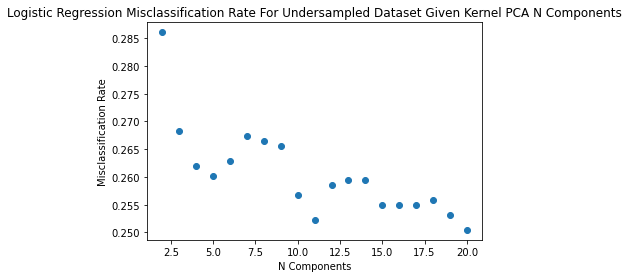

Best Kernel PCA N componets by misclassification rate for undersampled dataset: n_components = 20 misclassification rate = 0.250445632798574


In [ ]:
pairs = []
best_classification = []

#Running Kernel PCA on undersampled dataset with n components between 2 and 20
for i in range(2,21,1):
    kernelPCAObj = KernelPCA(n_components=i, kernel='rbf')
    kpca_X_train_under = kernelPCAObj.fit_transform(X_train_under)
    kpca_X_test_under = kernelPCAObj.transform(X_test_under)
    
    #Comparing Logistic Regression performance with each n components
    classifierObj = LogisticRegression(random_state=0)
    classifierObj.fit(kpca_X_train_under, y_train_under)

    #Predicting and saving the model's score
    misclass_rate = 1 - classifierObj.score(kpca_X_test_under,y_test_under)
    pairs.append([i, misclass_rate])

    #Comparing it to other model classifications thus far
    if (i == 2):
        best_classification = [i, misclass_rate]
    elif (best_classification[1] > misclass_rate):
        best_classification = [i, misclass_rate]

#Creating a scatterplot with our undersampled Kernel PCA misclassification results
n_to_accuracy = np.asarray(pairs)
x, y = n_to_accuracy.T
plt.title('Logistic Regression Misclassification Rate For Undersampled Dataset Given Kernel PCA N Components')
plt.xlabel('N Components')
plt.ylabel('Misclassification Rate')
plt.scatter(x, y)
plt.show()

print('Best Kernel PCA N componets by misclassification rate for undersampled dataset:',
      'n_components =', best_classification[0],
      'misclassification rate =', best_classification[1])

#Applying Kernel PCA using optimum N Components
kernelPCAObj = PCA(n_components=best_classification[0])
kpca_X_train_under = kernelPCAObj.fit_transform(X_train_under)
kpca_X_test_under = kernelPCAObj.transform(X_test_under)

#### Kernel PCA dimension reduction with optimum N components on Oversampled X & y

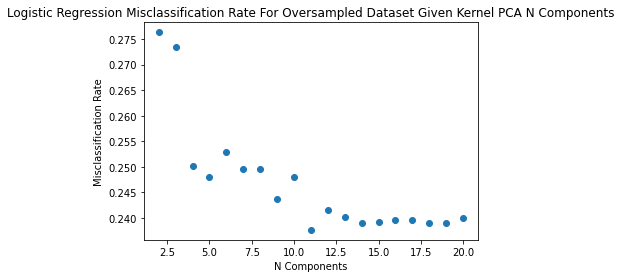

Best Kernel PCA N componets by misclassification rate for oversampled dataset: n_components = 11 misclassification rate = 0.2376811594202899


In [ ]:
pairs = []
best_classification = []

#Running Kernel PCA on oversampled dataset with n components between 2 and 20
for i in range(2,21,1):
    kernelPCAObj = KernelPCA(n_components=i, kernel='rbf')
    kpca_X_train_over = kernelPCAObj.fit_transform(X_train_over)
    kpca_X_test_over = kernelPCAObj.transform(X_test_over)
    
    #Comparing Logistic Regression performance with each n components
    classifierObj = LogisticRegression(random_state=0)
    classifierObj.fit(kpca_X_train_over, y_train_over)

    #Predicting and saving the model's score
    misclass_rate = 1 - classifierObj.score(kpca_X_test_over,y_test_over)
    pairs.append([i, misclass_rate])

    #Comparing it to other model classifications thus far
    if (i == 2):
        best_classification = [i, misclass_rate]
    elif (best_classification[1] > misclass_rate):
        best_classification = [i, misclass_rate]

#Creating a scatterplot with our undersampled Kernel PCA misclassification results
n_to_accuracy = np.asarray(pairs)
x, y = n_to_accuracy.T
plt.title('Logistic Regression Misclassification Rate For Oversampled Dataset Given Kernel PCA N Components')
plt.xlabel('N Components')
plt.ylabel('Misclassification Rate')
plt.scatter(x, y)
plt.show()

print('Best Kernel PCA N componets by misclassification rate for oversampled dataset:',
      'n_components =', best_classification[0],
      'misclassification rate =', best_classification[1])

#Applying Kernel PCA using optimum N Components
kernelPCAObj = PCA(n_components=best_classification[0])
kpca_X_train_over = kernelPCAObj.fit_transform(X_train_over)
kpca_X_test_over = kernelPCAObj.transform(X_test_over)

### LDA Dimension Reduction

#### LDA dimension reduction on Regularly Sampled X & y

In [ ]:
#Applying LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
ldaObj = LDA(n_components=1)
lda_X_train = ldaObj.fit_transform(X_train,y_train)
lda_X_test = ldaObj.transform(X_test)
components_variance = ldaObj.explained_variance_ratio_

#### LDA dimension reduction on Undersampled X & y

In [ ]:
#Applying LDA
ldaObj = LDA(n_components=1)
lda_X_train_under = ldaObj.fit_transform(X_train_under,y_train_under)
lda_X_test_under = ldaObj.transform(X_test_under)
components_variance_under = ldaObj.explained_variance_ratio_

#### LDA dimension reduction on Oversampled X & y

In [ ]:
#Applying LDA
ldaObj = LDA(n_components=1)
lda_X_train_over = ldaObj.fit_transform(X_train_over,y_train_over)
lda_X_test_over = ldaObj.transform(X_test_over)
components_variance_over = ldaObj.explained_variance_ratio_

## Classification Models

### Logistic Regression

#### Regularly Sampled X & y, with Original Dimensions, PCA, LDA, and Kernel PCA.

In [ ]:
#Logistic Regression: Regularly Sampled Original Dimensions
print('Logistic Regression Results:')
#Fitting Classifier Object
classifierObj = LogisticRegression(random_state=0)
classifierObj.fit(X_train, y_train)

#Making predictions on the Test Set
y_pred = classifierObj.predict(X_test)

#Model Accuracy
print("Regularly Sampled Original Dimensions Accuracy: ", classifierObj.score(X_test, y_test))

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierObj, X=X_train, y=y_train, cv=10)
print("\tK-fold Cross Validation Mean: ",modelAccuracies.mean())

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


#Logistic Regression: Regularly Sampled PCA

#Fitting Classifier Object
classifierObj = LogisticRegression(random_state=0)
classifierObj.fit(pca_X_train, y_train)

#Making predictions on the Test Set
pca_y_pred = classifierObj.predict(pca_X_test)

#Model Accuracy
print("Regularly Sampled PCA Accuracy: ", classifierObj.score(pca_X_test,y_test))

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierObj, X=pca_X_train, y=y_train, cv=10)
print("\tK-fold Cross Validation Mean: ",modelAccuracies.mean())

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pca_y_pred)
print(cm)


#Logistic Regression: Regularly Sampled LDA

#Fitting Classifier Object
classifierObj = LogisticRegression(random_state=0)
classifierObj.fit(lda_X_train, y_train)

#Making predictions on the Test Set
lda_y_pred = classifierObj.predict(lda_X_test)

#Model Accuracy
print("Regularly Sampled LDA: ", classifierObj.score(lda_X_test,y_test))

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierObj, X=lda_X_train, y=y_train, cv=10)
print("\tK-fold Cross Validation Mean: ",modelAccuracies.mean())

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, lda_y_pred)
print(cm)


#Logistic Regression: Regularly Sampled Kernel PCA

#Fitting Classifier Object
classifierObj = LogisticRegression(random_state=0)
classifierObj.fit(kpca_X_train, y_train)

#Making predictions on the Test Set
kpca_y_pred = classifierObj.predict(kpca_X_test)

#Model Accuracy
print("Regularly Sampled Kernel PCA: ", classifierObj.score(kpca_X_test,y_test))

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierObj, X=kpca_X_train, y=y_train, cv=10)
print("\tK-fold Cross Validation Mean: ",modelAccuracies.mean())

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, kpca_y_pred)
print(cm)


Logistic Regression Results:
Regularly Sampled Original Dimensions Accuracy:  0.8017037387600567
	K-fold Cross Validation Mean:  0.8040567951318458
[[1395  165]
 [ 254  299]]
Regularly Sampled PCA Accuracy:  0.8045433033601515
	K-fold Cross Validation Mean:  0.7997971602434077
[[1406  154]
 [ 259  294]]
Regularly Sampled LDA:  0.7988641741599621
	K-fold Cross Validation Mean:  0.8004056795131845
[[1404  156]
 [ 269  284]]
Regularly Sampled Kernel PCA:  0.7908187411263606
	K-fold Cross Validation Mean:  0.8024340770791074
[[1389  171]
 [ 271  282]]


#### Undersampled X & y, with Original Dimensions, PCA, LDA, and Kernel PCA.

In [ ]:
#Logistic Regression: Undersampled Original Dimensions
print('Logistic Regression Results:')
#Fitting Classifier Object
from sklearn.linear_model import LogisticRegression
classifierObj = LogisticRegression(random_state=0)
classifierObj.fit(X_train_under, y_train_under)

#Making predictions on the Test Set
y_pred_under = classifierObj.predict(X_test_under)

#Model Accuracy
print("Undersampled Original Dimensions Accuracy: ",classifierObj.score(X_test_under,y_test_under))

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierObj, X=X_train_under, y=y_train_under, cv=10)
print("\tK-fold Cross Validation Mean: ",modelAccuracies.mean())

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_under, y_pred_under)
print(cm)


#Logistic Regression: Undersampled PCA

#Fitting Classifier Object
from sklearn.linear_model import LogisticRegression
classifierObj = LogisticRegression(random_state=0)
classifierObj.fit(pca_X_train_under, y_train_under)

#Making predictions on the Test Set
pca_y_pred_under = classifierObj.predict(pca_X_test_under)

#Model Accuracy
print("Undersampled PCA Accuracy: ",classifierObj.score(pca_X_test_under,y_test_under))

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierObj, X=pca_X_train_under, y=y_train_under, cv=10)
print("\tK-fold Cross Validation Mean: ",modelAccuracies.mean())

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_under, pca_y_pred_under)
print(cm)


#Logistic Regression: Undersampled LDA

#Fitting Classifier Object
from sklearn.linear_model import LogisticRegression
classifierObj = LogisticRegression(random_state=0)
classifierObj.fit(lda_X_train_under, y_train_under)

#Making predictions on the Test Set
lda_y_pred_under = classifierObj.predict(lda_X_test_under)

#Model Accuracy
print("Undersampled LDA Accuracy: ",classifierObj.score(lda_X_test_under,y_test_under))

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierObj, X=lda_X_train_under, y=y_train_under, cv=10)
print("\tK-fold Cross Validation Mean: ",modelAccuracies.mean())

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_under, lda_y_pred_under)
print(cm)


#Logistic Regression: Undersampled Kernel PCA

#Fitting Classifier Object
from sklearn.linear_model import LogisticRegression
classifierObj = LogisticRegression(random_state=0)
classifierObj.fit(kpca_X_train_under, y_train_under)

#Making predictions on the Test Set
kpca_y_pred_under = classifierObj.predict(kpca_X_test_under)

#Model Accuracy
print("Undersampled Kernel PCA Accuracy: ",classifierObj.score(kpca_X_test_under,y_test_under))

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierObj, X=kpca_X_train_under, y=y_train_under, cv=10)
print("\tK-fold Cross Validation Mean: ",modelAccuracies.mean())

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_under, kpca_y_pred_under)
print(cm)

Logistic Regression Results:
Undersampled Original Dimensions Accuracy:  0.7584670231729055
	K-fold Cross Validation Mean:  0.7713974437717528
[[408 153]
 [118 443]]
Undersampled PCA Accuracy:  0.7566844919786097
	K-fold Cross Validation Mean:  0.763737533268989
[[409 152]
 [121 440]]
Undersampled LDA Accuracy:  0.7513368983957219
	K-fold Cross Validation Mean:  0.7736904448539089
[[412 149]
 [130 431]]
Undersampled Kernel PCA Accuracy:  0.749554367201426
	K-fold Cross Validation Mean:  0.7664268374718493
[[409 152]
 [129 432]]


#### Oversampled X & y, with Original Dimensions, PCA, LDA, and Kernel PCA.

In [ ]:
#Logistic Regression: Oversampled Original Dimensions
print("Logistic Regression Results:")
#Fitting Classifier Object
from sklearn.linear_model import LogisticRegression
classifierObj = LogisticRegression(random_state=0)
classifierObj.fit(X_train_over, y_train_over)

#Making predictions on the Test Set
y_pred_over = classifierObj.predict(X_test_over)

#Model Accuracy
print("Oversampled Original Dimensions Accuracy: ",classifierObj.score(X_test_over,y_test_over))

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierObj, X=X_train_over, y=y_train_over, cv=10)
print("\tK-fold Cross Validation Mean: ",modelAccuracies.mean())

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_over, y_pred_over)
print(cm)


#Logistic Regression: Oversampled PCA 

#Fitting Classifier Object
from sklearn.linear_model import LogisticRegression
classifierObj = LogisticRegression(random_state=0)
classifierObj.fit(pca_X_train_over, y_train_over)

#Making predictions on the Test Set
pca_y_pred_over = classifierObj.predict(pca_X_test_over)

#Model Accuracy
print("Oversampled PCA Accuracy: ",classifierObj.score(pca_X_test_over,y_test_over))

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierObj, X=pca_X_train_over, y=y_train_over, cv=10)
print("\tK-fold Cross Validation Mean: ",modelAccuracies.mean())

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_over, pca_y_pred_over)
print(cm)


#Logistic Regression: Oversampled LDA

#Fitting Classifier Object
from sklearn.linear_model import LogisticRegression
classifierObj = LogisticRegression(random_state=0)
classifierObj.fit(lda_X_train_over, y_train_over)

#Making predictions on the Test Set
lda_y_pred_over = classifierObj.predict(lda_X_test_over)

#Model Accuracy
print("Oversampled LDA Accuracy: ",classifierObj.score(lda_X_test_over,y_test_over))

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierObj, X=lda_X_train_over, y=y_train_over, cv=10)
print("\tK-fold Cross Validation Mean: ",modelAccuracies.mean())

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_over, lda_y_pred_over)
print(cm)


#Logistic Regression: Oversampled Kernel PCA

#Fitting Classifier Object
from sklearn.linear_model import LogisticRegression
classifierObj = LogisticRegression(random_state=0)
classifierObj.fit(kpca_X_train_over, y_train_over)

#Making predictions on the Test Set
kpca_y_pred_over = classifierObj.predict(kpca_X_test_over)

#Model Accuracy
print("Oversampled Kernel PCA Accuracy: ",classifierObj.score(kpca_X_test_over,y_test_over))

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierObj, X=kpca_X_train_over, y=y_train_over, cv=10)
print("\tK-fold Cross Validation Mean: ",modelAccuracies.mean())

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_over, kpca_y_pred_over)
print(cm)

Logistic Regression Results:
Oversampled Original Dimensions Accuracy:  0.7697262479871175
	K-fold Cross Validation Mean:  0.763636311678415
[[1115  432]
 [ 283 1275]]
Oversampled PCA Accuracy:  0.7677938808373591
	K-fold Cross Validation Mean:  0.7634997142312823
[[1138  409]
 [ 312 1246]]
Oversampled LDA Accuracy:  0.7694041867954912
	K-fold Cross Validation Mean:  0.7622570013335874
[[1131  416]
 [ 300 1258]]
Oversampled Kernel PCA Accuracy:  0.7561996779388084
	K-fold Cross Validation Mean:  0.7561813678795961
[[1116  431]
 [ 326 1232]]


### Kernel SVM

#### Regularly Sampled X & y, with Original Dimensions, LDA, and Kernel PCA.

In [ ]:
#Kernel SVM Regularly Sampled Original Dimensions
print("Kernel SVM Results:")
#Fitting Classifier to Training Set.
from sklearn.svm import SVC
classifierObj = SVC()
classifierObj.fit(X_train, y_train)

#Making predictions on the Test Set
y_pred = classifierObj.predict(X_test)

#Model Accuracy
print("Regularly Sampled Original Dimensions Accuracy: ",classifierObj.score(X_test,y_test))

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierObj, X=X_train, y=y_train, cv=10)
print("\tK-fold Cross Validation Mean: ",modelAccuracies.mean())

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


#Kernel SVM Regularly Sampled PCA

#Fitting Classifier to Training Set.
from sklearn.svm import SVC
classifierObj = SVC()
classifierObj.fit(pca_X_train, y_train)

#Making predictions on the Test Set
pca_y_pred = classifierObj.predict(pca_X_test)

#Model Accuracy
print("Regularly Sampled PCA Accuracy: ",classifierObj.score(pca_X_test,y_test))

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierObj, X=pca_X_train, y=y_train, cv=10)
print("\tK-fold Cross Validation Mean: ",modelAccuracies.mean())

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pca_y_pred)
print(cm)


#Kernel SVM Regularly Sampled LDA

#Fitting Classifier to Training Set.
from sklearn.svm import SVC
classifierObj = SVC()
classifierObj.fit(lda_X_train, y_train)

#Making predictions on the Test Set
lda_y_pred= classifierObj.predict(lda_X_test)

#Model Accuracy
print("Regularly Sampled LDA Accuracy: ",classifierObj.score(lda_X_test,y_test))

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierObj, X=lda_X_train, y=y_train, cv=10)
print("\tK-fold Cross Validation Mean: ",modelAccuracies.mean())

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, lda_y_pred)
print(cm)


#Kernel SVM Regularly Sampled Kernel PCA

#Fitting Classifier to Training Set.
from sklearn.svm import SVC
classifierObj = SVC()
classifierObj.fit(kpca_X_train, y_train)

#Making predictions on the Test Set
kpca_y_pred = classifierObj.predict(kpca_X_test)

#Model Accuracy
print("Regularly Sampled Kernel PCA Accuracy: ",classifierObj.score(kpca_X_test,y_test))

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierObj, X=kpca_X_train, y=y_train, cv=10)
print("\tK-fold Cross Validation Mean: ",modelAccuracies.mean())

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, kpca_y_pred)
print(cm)

Kernel SVM Results:
Regularly Sampled Original Dimensions Accuracy:  0.7941315664931378
	K-fold Cross Validation Mean:  0.7957403651115619
[[1411  149]
 [ 286  267]]
Regularly Sampled PCA Accuracy:  0.79649787032655
	K-fold Cross Validation Mean:  0.7955375253549696
[[1417  143]
 [ 287  266]]
Regularly Sampled LDA Accuracy:  0.8012304779933743
	K-fold Cross Validation Mean:  0.8012170385395537
[[1419  141]
 [ 279  274]]
Regularly Sampled Kernel PCA Accuracy:  0.7974443918599148
	K-fold Cross Validation Mean:  0.7991886409736308
[[1415  145]
 [ 283  270]]


#### Undersampled X & y, with Original Dimensions, PCA, LDA, and Kernel PCA.

In [ ]:
#Kernel SVM Undersampled Original Dimensions
print('Kernel SVM Results:')
#Fitting Classifier to Training Set.
from sklearn.svm import SVC
classifierObj = SVC()
classifierObj.fit(X_train_under, y_train_under)

#Making predictions on the Test Set
y_pred_under = classifierObj.predict(X_test_under)

#Model Accuracy
print("Undersampled Original Dimensions Accuracy: ",classifierObj.score(X_test_under,y_test_under))

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierObj, X=X_train_under, y=y_train_under, cv=10)
print("\tK-fold Cross Validation Mean: ",modelAccuracies.mean())

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_under, y_pred_under)
print(cm)


#Kernel SVM Undersampled PCA

#Fitting Classifier to Training Set.
from sklearn.svm import SVC
classifierObj = SVC()
classifierObj.fit(pca_X_train_under, y_train_under)

#Making predictions on the Test Set
pca_y_pred_under = classifierObj.predict(pca_X_test_under)

#Model Accuracy
print("Undersampled PCA Accuracy: ",classifierObj.score(pca_X_test_under,y_test_under))

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierObj, X=pca_X_train_under, y=y_train_under, cv=10)
print("\tK-fold Cross Validation Mean: ",modelAccuracies.mean())

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_under, pca_y_pred_under)
print(cm)


#Kernel SVM Undersampled LDA

#Fitting Classifier to Training Set.
from sklearn.svm import SVC
classifierObj = SVC()
classifierObj.fit(lda_X_train_under, y_train_under)

#Making predictions on the Test Set
lda_y_pred_under = classifierObj.predict(lda_X_test_under)

#Model Accuracy
print("Undersampled LDA Accuracy: ",classifierObj.score(lda_X_test_under,y_test_under))

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierObj, X=lda_X_train_under, y=y_train_under, cv=10)
print("\tK-fold Cross Validation Mean: ",modelAccuracies.mean())

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_under, lda_y_pred_under)
print(cm)


#Kernel SVM Undersampled Kernel PCA

#Fitting Classifier to Training Set.
from sklearn.svm import SVC
classifierObj = SVC()
classifierObj.fit(kpca_X_train_under, y_train_under)

#Making predictions on the Test Set
kpca_y_pred_under = classifierObj.predict(kpca_X_test_under)

#Model Accuracy
print("Undersampled Kernel PCA Accuracy: ",classifierObj.score(kpca_X_test_under,y_test_under))

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierObj, X=kpca_X_train_under, y=y_train_under, cv=10)
print("\tK-fold Cross Validation Mean: ",modelAccuracies.mean())

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_under, kpca_y_pred_under)
print(cm)

Kernel SVM Results:
Undersampled Original Dimensions Accuracy:  0.7388591800356507
	K-fold Cross Validation Mean:  0.7602994940188937
[[399 162]
 [131 430]]
Undersampled PCA Accuracy:  0.7388591800356507
	K-fold Cross Validation Mean:  0.7534248778918429
[[394 167]
 [126 435]]
Undersampled LDA Accuracy:  0.7531194295900179
	K-fold Cross Validation Mean:  0.7713959813986137
[[416 145]
 [132 429]]
Undersampled Kernel PCA Accuracy:  0.7361853832442068
	K-fold Cross Validation Mean:  0.7557076423620251
[[394 167]
 [129 432]]


#### Oversampled X & y, with Original Dimensions, PCA, LDA and Kernel PCA.

In [ ]:
#Kernel SVM Oversampled Original Dimensions
print("Kernel SVM Results:")
#Fitting Classifier to Training Set.
from sklearn.svm import SVC
classifierObj = SVC()
classifierObj.fit(X_train_over, y_train_over)

#Making predictions on the Test Set
y_pred_over = classifierObj.predict(X_test_over)

#Model Accuracy
print("Oversampled Original Dimensions Accuracy: ", classifierObj.score(X_test_over,y_test_over))

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierObj, X=X_train_over, y=y_train_over, cv=10)
print("\tK-fold Cross Validation Mean: ",modelAccuracies.mean())

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_over, y_pred_over)
print(cm)


#Kernel SVM Oversampled PCA

#Fitting Classifier to Training Set.
from sklearn.svm import SVC
classifierObj = SVC()
classifierObj.fit(pca_X_train_over, y_train_over)

#Making predictions on the Test Set
pca_y_pred_over = classifierObj.predict(pca_X_test_over)

#Model Accuracy
print("Oversampled PCA Accuracy: ", classifierObj.score(pca_X_test_over,y_test_over))

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierObj, X=pca_X_train_over, y=y_train_over, cv=10)
print("\tK-fold Cross Validation Mean: ",modelAccuracies.mean())

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_over, pca_y_pred_over)
print(cm)


#Kernel SVM Oversampled LDA

#Fitting Classifier to Training Set.
from sklearn.svm import SVC
classifierObj = SVC()
classifierObj.fit(lda_X_train_over, y_train_over)

#Making predictions on the Test Set
lda_y_pred_over = classifierObj.predict(lda_X_test_over)

#Model Accuracy
print("Oversampled LDA Accuracy: ", classifierObj.score(lda_X_test_over,y_test_over))

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierObj, X=lda_X_train_over, y=y_train_over, cv=10)
print("\tK-fold Cross Validation Mean: ",modelAccuracies.mean())

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_over, lda_y_pred_over)
print(cm)


#Kernel SVM Oversampled Kernel PCA

#Fitting Classifier to Training Set.
from sklearn.svm import SVC
classifierObj = SVC()
classifierObj.fit(kpca_X_train_over, y_train_over)

#Making predictions on the Test Set
kpca_y_pred_over = classifierObj.predict(kpca_X_test_over)

#Model Accuracy
print("Oversampled Kernel PCA Accuracy: ", classifierObj.score(kpca_X_test_over,y_test_over))

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierObj, X=kpca_X_train_over, y=y_train_over, cv=10)
print("\tK-fold Cross Validation Mean: ",modelAccuracies.mean())

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_over, kpca_y_pred_over)
print(cm)

Kernel SVM Results:
Oversampled Original Dimensions Accuracy:  0.77487922705314
	K-fold Cross Validation Mean:  0.7753724518955992
[[1124  423]
 [ 276 1282]]
Oversampled PCA Accuracy:  0.7739130434782608
	K-fold Cross Validation Mean:  0.7744057915793484
[[1125  422]
 [ 280 1278]]
Oversampled LDA Accuracy:  0.7697262479871175
	K-fold Cross Validation Mean:  0.7628091064964755
[[1130  417]
 [ 298 1260]]
Oversampled Kernel PCA Accuracy:  0.7613526570048309
	K-fold Cross Validation Mean:  0.7672244236997524
[[1112  435]
 [ 306 1252]]


### k-NN

#### Regularly Sampled X & y, with Original Dimensions, PCA, LDA, and Kernel PCA.

In [ ]:
# KNN Regularly Sampled Original Dimensions
print("k-NN Results:")
#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj (you choose neighbors)
from sklearn.neighbors import KNeighborsClassifier
classifierObj = KNeighborsClassifier(n_neighbors=25, p=2, metric='minkowski')
classifierObj.fit(X_train, y_train)

#Making predictions on the Test Set
y_pred = classifierObj.predict(X_test)

#Model Accuracy
print("Regularly Sampled Original Dimensions Accuracy: ",classifierObj.score(X_test,y_test))

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierObj, X=X_train, y=y_train, cv=10)
print("\tK-fold Cross Validation Mean: ",modelAccuracies.mean())

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


# KNN Regularly Sampled PCA

#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj (you choose neighbors)
from sklearn.neighbors import KNeighborsClassifier
classifierObj = KNeighborsClassifier(n_neighbors=25, p=2, metric='minkowski')
classifierObj.fit(pca_X_train, y_train)

#Making predictions on the Test Set
pca_y_pred = classifierObj.predict(pca_X_test)

#Model Accuracy
print("Regularly Sampled PCA Accuracy: ",classifierObj.score(pca_X_test,y_test))

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierObj, X=pca_X_train, y=y_train, cv=10)
print("\tK-fold Cross Validation Mean: ",modelAccuracies.mean())

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pca_y_pred)
print(cm)


# KNN Regularly Sampled LDA

#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj (you choose neighbors)
from sklearn.neighbors import KNeighborsClassifier
classifierObj = KNeighborsClassifier(n_neighbors=25, p=2, metric='minkowski')
classifierObj.fit(lda_X_train, y_train)

#Making predictions on the Test Set
lda_y_pred = classifierObj.predict(lda_X_test)

#Model Accuracy
print("Regularly Sampled LDA Accuracy: ",classifierObj.score(lda_X_test,y_test))

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierObj, X=lda_X_train, y=y_train, cv=10)
print("\tK-fold Cross Validation Mean: ",modelAccuracies.mean())

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, lda_y_pred)
print(cm)


# KNN Regularly Sampled Kernel PCA

#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj (you choose neighbors)
from sklearn.neighbors import KNeighborsClassifier
classifierObj = KNeighborsClassifier(n_neighbors=25, p=2, metric='minkowski')
classifierObj.fit(kpca_X_train, y_train)

#Making predictions on the Test Set
kpca_y_pred = classifierObj.predict(kpca_X_test)

#Model Accuracy
print("Regularly Sampled Kernel PCA Accuracy: ",classifierObj.score(kpca_X_test,y_test))

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierObj, X=kpca_X_train, y=y_train, cv=10)
print("\tK-fold Cross Validation Mean: ",modelAccuracies.mean())

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, kpca_y_pred)
print(cm)

k-NN Results:
Regularly Sampled Original Dimensions Accuracy:  0.7841930903928065
	K-fold Cross Validation Mean:  0.7841784989858012
[[1345  215]
 [ 241  312]]
Regularly Sampled PCA Accuracy:  0.7780407004259347
	K-fold Cross Validation Mean:  0.7821501014198784
[[1336  224]
 [ 245  308]]
Regularly Sampled LDA Accuracy:  0.7846663511594889
	K-fold Cross Validation Mean:  0.8014198782961459
[[1388  172]
 [ 283  270]]
Regularly Sampled Kernel PCA Accuracy:  0.7860861334595362
	K-fold Cross Validation Mean:  0.7791075050709939
[[1357  203]
 [ 249  304]]


#### Undersampled X & y, with Original Dimensions, PCA, LDA, and Kernel PCA.

In [ ]:
#kNN Undersampled Original Dimensions
print("k-NN Results:")
#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj (you choose neighbors)
from sklearn.neighbors import KNeighborsClassifier
classifierObj = KNeighborsClassifier(n_neighbors=25, p=2, metric='minkowski')
classifierObj.fit(X_train_under, y_train_under)

#Making predictions on the Test Set
y_pred_under = classifierObj.predict(X_test_under)

#Model Accuracy
print("Undersampled Original Dimensions Accuracy: ",classifierObj.score(X_test_under,y_test_under))

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierObj, X=X_train_under, y=y_train_under, cv=10)
print("\tK-fold Cross Validation Mean: ",modelAccuracies.mean())

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_under, y_pred_under)
print(cm)


#kNN Undersampled PCA

#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj (you choose neighbors)
from sklearn.neighbors import KNeighborsClassifier
classifierObj = KNeighborsClassifier(n_neighbors=25, p=2, metric='minkowski')
classifierObj.fit(pca_X_train_under, y_train_under)

#Making predictions on the Test Set
pca_y_pred_under = classifierObj.predict(pca_X_test_under)

#Model Accuracy
print("Undersampled PCA Accuracy: ",classifierObj.score(pca_X_test_under,y_test_under))

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierObj, X=pca_X_train_under, y=y_train_under, cv=10)
print("\tK-fold Cross Validation Mean: ",modelAccuracies.mean())

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_under, pca_y_pred_under)
print(cm)


#kNN Undersampled LDA

#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj (you choose neighbors)
from sklearn.neighbors import KNeighborsClassifier
classifierObj = KNeighborsClassifier(n_neighbors=25, p=2, metric='minkowski')
classifierObj.fit(lda_X_train_under, y_train_under)

#Making predictions on the Test Set
lda_y_pred_under = classifierObj.predict(lda_X_test_under)

#Model Accuracy
print("Undersampled LDA Accuracy: ",classifierObj.score(lda_X_test_under,y_test_under))

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierObj, X=lda_X_train_under, y=y_train_under, cv=10)
print("\tK-fold Cross Validation Mean: ",modelAccuracies.mean())

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_under, lda_y_pred_under)
print(cm)


#kNN Undersampled Kernel PCA

#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj (you choose neighbors)
from sklearn.neighbors import KNeighborsClassifier
classifierObj = KNeighborsClassifier(n_neighbors=25, p=2, metric='minkowski')
classifierObj.fit(kpca_X_train_under, y_train_under)

#Making predictions on the Test Set
kpca_y_pred_under = classifierObj.predict(kpca_X_test_under)

#Model Accuracy
print("Undersampled KPCA Accuracy: ",classifierObj.score(kpca_X_test_under,y_test_under))

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierObj, X=kpca_X_train_under, y=y_train_under, cv=10)
print("\tK-fold Cross Validation Mean: ",modelAccuracies.mean())

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_under, kpca_y_pred_under)
print(cm)

k-NN Results:
Undersampled Original Dimensions Accuracy:  0.7237076648841355
	K-fold Cross Validation Mean:  0.7346977274721419
[[356 205]
 [105 456]]
Undersampled PCA Accuracy:  0.7406417112299465
	K-fold Cross Validation Mean:  0.7358486151326373
[[364 197]
 [ 94 467]]
Undersampled LDA Accuracy:  0.7468805704099821
	K-fold Cross Validation Mean:  0.7606928723933198
[[413 148]
 [136 425]]
Undersampled KPCA Accuracy:  0.7272727272727273
	K-fold Cross Validation Mean:  0.7339343686935159
[[361 200]
 [106 455]]


#### Oversampled X & y, with Original Dimensions, PCA, LDA, and Kernel PCA.

In [ ]:
#kNN Oversampled Original Dimensions
print("k-NN Results:")
#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj (you choose neighbors)
from sklearn.neighbors import KNeighborsClassifier
classifierObj = KNeighborsClassifier(n_neighbors=25, p=2, metric='minkowski')
classifierObj.fit(X_train_over, y_train_over)

#Making predictions on the Test Set
y_pred_over = classifierObj.predict(X_test_over)

#Model Accuracy
print("Oversampled Original Dimensions Accuracy: ",classifierObj.score(X_test_over,y_test_over))

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierObj, X=X_train_over, y=y_train_over, cv=10)
print("\tK-fold Cross Validation Mean: ",modelAccuracies.mean())

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_over, y_pred_over)
print(cm)


#kNN Oversampled PCA

#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj (you choose neighbors)
from sklearn.neighbors import KNeighborsClassifier
classifierObj = KNeighborsClassifier(n_neighbors=25, p=2, metric='minkowski')
classifierObj.fit(pca_X_train_over, y_train_over)

#Making predictions on the Test Set
pca_y_pred_over = classifierObj.predict(pca_X_test_over)

#Model Accuracy
print("Oversampled PCA Accuracy: ",classifierObj.score(pca_X_test_over,y_test_over))

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierObj, X=pca_X_train_over, y=y_train_over, cv=10)
print("\tK-fold Cross Validation Mean: ",modelAccuracies.mean())

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_over, pca_y_pred_over)
print(cm)


#kNN Oversampled LDA

#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj (you choose neighbors)
from sklearn.neighbors import KNeighborsClassifier
classifierObj = KNeighborsClassifier(n_neighbors=25, p=2, metric='minkowski')
classifierObj.fit(lda_X_train_over, y_train_over)

#Making predictions on the Test Set
lda_y_pred_over = classifierObj.predict(lda_X_test_over)

#Model Accuracy
print("Oversampled LDA Accuracy: ",classifierObj.score(lda_X_test_over,y_test_over))

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierObj, X=lda_X_train_over, y=y_train_over, cv=10)
print("\tK-fold Cross Validation Mean: ",modelAccuracies.mean())

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_over, lda_y_pred_over)
print(cm)


#kNN Oversampled Kernel PCA

#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj (you choose neighbors)
from sklearn.neighbors import KNeighborsClassifier
classifierObj = KNeighborsClassifier(n_neighbors=25, p=2, metric='minkowski')
classifierObj.fit(kpca_X_train_over, y_train_over)

#Making predictions on the Test Set
kpca_y_pred_over = classifierObj.predict(kpca_X_test_over)

#Model Accuracy
print("Oversampled Kernel PCA Accuracy: ",classifierObj.score(kpca_X_test_over,y_test_over))

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierObj, X=kpca_X_train_over, y=y_train_over, cv=10)
print("\tK-fold Cross Validation Mean: ",modelAccuracies.mean())

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_over, kpca_y_pred_over)
print(cm)

k-NN Results:
Oversampled Original Dimensions Accuracy:  0.7491143317230273
	K-fold Cross Validation Mean:  0.7490036197370926
[[ 999  548]
 [ 231 1327]]
Oversampled PCA Accuracy:  0.7523349436392914
	K-fold Cross Validation Mean:  0.7478975042865308
[[1003  544]
 [ 225 1333]]
Oversampled LDA Accuracy:  0.7697262479871175
	K-fold Cross Validation Mean:  0.7549430367689084
[[1108  439]
 [ 276 1282]]
Oversampled Kernel PCA Accuracy:  0.7523349436392914
	K-fold Cross Validation Mean:  0.761705467708135
[[1044  503]
 [ 266 1292]]


### Decision Tree

#### Regularly Sampled X & y, with Original Dimensions, PCA, LDA, and Kernel PCA.

In [ ]:
#Decision Tree Regularly Sampled Original Dimensions
print("Decision Tree Results:")
#Fitting Classifier to Training Set. 
from sklearn.tree import DecisionTreeClassifier
classifierObj = DecisionTreeClassifier(criterion='entropy')
classifierObj.fit(X_train,y_train)

#Making predictions on the Test Set
y_pred = classifierObj.predict(X_test)

#Model Accuracy
print("Regularly Sampled Original Dimensions Accuracy: ",classifierObj.score(X_test,y_test))

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierObj, X=X_train, y=y_train, cv=10)
print("\tK-fold Cross Validation Mean: ",modelAccuracies.mean())

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


#Decision Tree Regularly Sampled PCA

#Fitting Classifier to Training Set. 
from sklearn.tree import DecisionTreeClassifier
classifierObj = DecisionTreeClassifier(criterion='entropy')
classifierObj.fit(pca_X_train,y_train)

#Making predictions on the Test Set
pca_y_pred = classifierObj.predict(pca_X_test)

#Model Accuracy
print("Regularly Sampled PCA Accuracy: ",classifierObj.score(pca_X_test,y_test))

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierObj, X=pca_X_train, y=y_train, cv=10)
print("\tK-fold Cross Validation Mean: ",modelAccuracies.mean())

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pca_y_pred)
print(cm)


#Decision Tree Regularly Sampled LDA

#Fitting Classifier to Training Set. 
from sklearn.tree import DecisionTreeClassifier
classifierObj = DecisionTreeClassifier(criterion='entropy')
classifierObj.fit(lda_X_train,y_train)

#Making predictions on the Test Set
lda_y_pred = classifierObj.predict(lda_X_test)

#Model Accuracy
print("Regularly Sampled LDA Accuracy: ",classifierObj.score(lda_X_test,y_test))

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierObj, X=lda_X_train, y=y_train, cv=10)
print("\tK-fold Cross Validation Mean: ",modelAccuracies.mean())

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, lda_y_pred)
print(cm)


#Decision Tree Regularly Sampled Kernel PCA

#Fitting Classifier to Training Set. 
from sklearn.tree import DecisionTreeClassifier
classifierObj = DecisionTreeClassifier(criterion='entropy')
classifierObj.fit(kpca_X_train,y_train)

#Making predictions on the Test Set
kpca_y_pred = classifierObj.predict(kpca_X_test)

#Model Accuracy
print("Regularly Sampled Kernel PCA Accuracy: ",classifierObj.score(kpca_X_test,y_test))

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierObj, X=kpca_X_train, y=y_train, cv=10)
print("\tK-fold Cross Validation Mean: ",modelAccuracies.mean())

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, kpca_y_pred)
print(cm)

Decision Tree Results:
Regularly Sampled Original Dimensions Accuracy:  0.7179365830572646
	K-fold Cross Validation Mean:  0.7324543610547668
[[1247  313]
 [ 283  270]]
Regularly Sampled PCA Accuracy:  0.7221959299574066
	K-fold Cross Validation Mean:  0.7121703853955376
[[1263  297]
 [ 290  263]]
Regularly Sampled LDA Accuracy:  0.7174633222905821
	K-fold Cross Validation Mean:  0.7281947261663285
[[1261  299]
 [ 298  255]]
Regularly Sampled Kernel PCA Accuracy:  0.7046852815901562
	K-fold Cross Validation Mean:  0.7221095334685599
[[1236  324]
 [ 300  253]]


#### Undersampled X & y with Original Dimensions, PCA, LDA and Kernel PCA.

In [ ]:
#Decision Tree Undersampled Original Dimensions
print("Decision Tree Results:")
#Fitting Classifier to Training Set. 
from sklearn.tree import DecisionTreeClassifier
classifierObj = DecisionTreeClassifier(criterion='entropy')
classifierObj.fit(X_train_under,y_train_under)

#Making predictions on the Test Set
y_pred_under = classifierObj.predict(X_test_under)

#Model Accuracy
print("Undersampled Original Dimensions Accuracy: ", classifierObj.score(X_test_under,y_test_under))

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierObj, X=X_train_under, y=y_train_under, cv=10)
print("\tK-fold Cross Validation Mean: ",modelAccuracies.mean())

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_under, y_pred_under)
print(cm)


#Decision Tree Undersampled PCA

#Fitting Classifier to Training Set. 
from sklearn.tree import DecisionTreeClassifier
classifierObj = DecisionTreeClassifier(criterion='entropy')
classifierObj.fit(pca_X_train_under,y_train_under)

#Making predictions on the Test Set
pca_y_pred_under = classifierObj.predict(pca_X_test_under)

#Model Accuracy
print("Undersampled PCA Accuracy: ", classifierObj.score(pca_X_test_under,y_test_under))

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierObj, X=pca_X_train_under, y=y_train_under, cv=10)
print("\tK-fold Cross Validation Mean: ",modelAccuracies.mean())

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_under, pca_y_pred_under)
print(cm)


#Decision Tree Undersampled LDA

#Fitting Classifier to Training Set. 
from sklearn.tree import DecisionTreeClassifier
classifierObj = DecisionTreeClassifier(criterion='entropy')
classifierObj.fit(lda_X_train_under,y_train_under)

#Making predictions on the Test Set
lda_y_pred_under = classifierObj.predict(lda_X_test_under)

#Model Accuracy
print("Undersampled Original LDA: ", classifierObj.score(lda_X_test_under,y_test_under))

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierObj, X=lda_X_train_under, y=y_train_under, cv=10)
print("\tK-fold Cross Validation Mean: ",modelAccuracies.mean())

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_under, lda_y_pred_under)
print(cm)


#Decision Tree Undersampled Kernel PCA

#Fitting Classifier to Training Set. 
from sklearn.tree import DecisionTreeClassifier
classifierObj = DecisionTreeClassifier(criterion='entropy')
classifierObj.fit(kpca_X_train_under,y_train_under)

#Making predictions on the Test Set
kpca_y_pred_under = classifierObj.predict(kpca_X_test_under)

#Model Accuracy
print("Undersampled Kernel PCA Accuracy: ", classifierObj.score(kpca_X_test_under,y_test_under))

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierObj, X=kpca_X_train_under, y=y_train_under, cv=10)
print("\tK-fold Cross Validation Mean: ",modelAccuracies.mean())

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_under, kpca_y_pred_under)
print(cm)

Decision Tree Results:
Undersampled Original Dimensions Accuracy:  0.6693404634581105
	K-fold Cross Validation Mean:  0.6976265683951917
[[387 174]
 [197 364]]
Undersampled PCA Accuracy:  0.6746880570409982
	K-fold Cross Validation Mean:  0.6758284343833172
[[379 182]
 [183 378]]
Undersampled Original LDA:  0.6666666666666666
	K-fold Cross Validation Mean:  0.7033722324588342
[[368 193]
 [181 380]]
Undersampled Kernel PCA Accuracy:  0.6666666666666666
	K-fold Cross Validation Mean:  0.6800312947851773
[[380 181]
 [193 368]]


#### Oversampled X & y, with Original Dimensions, PCA, LDA and Kernel PCA.

In [ ]:
#Decision Tree Oversampled Original Dimensions
print("Decision Tree Results:")
#Fitting Classifier to Training Set. 
from sklearn.tree import DecisionTreeClassifier
classifierObj = DecisionTreeClassifier(criterion='entropy')
classifierObj.fit(X_train_over,y_train_over)

#Making predictions on the Test Set
y_pred_over = classifierObj.predict(X_test_over)

#Model Accuracy
print("Oversampled Original Dimensions Accuracy: ", classifierObj.score(X_test_over,y_test_over))

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierObj, X=X_train_over, y=y_train_over, cv=10)
print("\tK-fold Cross Validation Mean: ",modelAccuracies.mean())

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_over, y_pred_over)
print(cm)


#Decision Tree Oversampled PCA

#Fitting Classifier to Training Set. 
from sklearn.tree import DecisionTreeClassifier
classifierObj = DecisionTreeClassifier(criterion='entropy')
classifierObj.fit(pca_X_train_over,y_train_over)

#Making predictions on the Test Set
pca_y_pred_over = classifierObj.predict(pca_X_test_over)

#Model Accuracy
print("Oversampled PCA Accuracy: ", classifierObj.score(pca_X_test_over,y_test_over))

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierObj, X=pca_X_train_over, y=y_train_over, cv=10)
print("\tK-fold Cross Validation Mean: ",modelAccuracies.mean())

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_over, pca_y_pred_over)
print(cm)


#Decision Tree Oversampled LDA

#Fitting Classifier to Training Set. 
from sklearn.tree import DecisionTreeClassifier
classifierObj = DecisionTreeClassifier(criterion='entropy')
classifierObj.fit(lda_X_train_over,y_train_over)

#Making predictions on the Test Set
lda_y_pred_over = classifierObj.predict(lda_X_test_over)

#Model Accuracy
print("Oversampled LDA Accuracy: ", classifierObj.score(lda_X_test_over,y_test_over))

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierObj, X=lda_X_train_over, y=y_train_over, cv=10)
print("\tK-fold Cross Validation Mean: ",modelAccuracies.mean())

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_over, lda_y_pred_over)
print(cm)


#Decision Tree Oversampled Kernel PCA

#Fitting Classifier to Training Set. 
from sklearn.tree import DecisionTreeClassifier
classifierObj = DecisionTreeClassifier(criterion='entropy')
classifierObj.fit(kpca_X_train_over,y_train_over)

#Making predictions on the Test Set
kpca_y_pred_over = classifierObj.predict(kpca_X_test_over)

#Model Accuracy
print("Oversampled Kernel PCA Accuracy: ", classifierObj.score(kpca_X_test_over,y_test_over))

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierObj, X=kpca_X_train_over, y=y_train_over, cv=10)
print("\tK-fold Cross Validation Mean: ",modelAccuracies.mean())

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_over, kpca_y_pred_over)
print(cm)

Decision Tree Results:
Oversampled Original Dimensions Accuracy:  0.842512077294686
	K-fold Cross Validation Mean:  0.8420554391312629
[[1196  351]
 [ 138 1420]]
Oversampled PCA Accuracy:  0.8415458937198068
	K-fold Cross Validation Mean:  0.8341842255667746
[[1199  348]
 [ 144 1414]]
Oversampled LDA Accuracy:  0.8492753623188406
	K-fold Cross Validation Mean:  0.8410925890645838
[[1200  347]
 [ 121 1437]]
Oversampled Kernel PCA Accuracy:  0.8357487922705314
	K-fold Cross Validation Mean:  0.8336325014288436
[[1174  373]
 [ 137 1421]]


### Random Forest

#### Regularly Sampled X & y, with Original Dimensions, PCA, LDA and Kernel PCA.

In [ ]:
#Random Forest: Regularly Sampled, Original Dimensions
print("Random Forest Results:")
#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
from sklearn.ensemble import RandomForestClassifier
classifierObj = RandomForestClassifier(criterion='entropy')
classifierObj.fit(X_train,y_train)

#Making predictions on the Test Set
y_pred = classifierObj.predict(X_test)

#Model Accuracy
print("Regularly Sampled Original Dimensions Accuracy: ", classifierObj.score(X_test,y_test))

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierObj, X=X_train, y=y_train, cv=10)
print("\tK-fold Cross Validation Mean: ",modelAccuracies.mean())

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


#Random Forest: Regularly Sampled PCA

#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
from sklearn.ensemble import RandomForestClassifier
classifierObj = RandomForestClassifier(criterion='entropy')
classifierObj.fit(pca_X_train,y_train)

#Making predictions on the Test Set
pca_y_pred = classifierObj.predict(pca_X_test)

#Model Accuracy
print("Regularly Sampled PCA Accuracy: ", classifierObj.score(pca_X_test,y_test))

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierObj, X=pca_X_train, y=y_train, cv=10)
print("\tK-fold Cross Validation Mean: ",modelAccuracies.mean())

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pca_y_pred)
print(cm)


#Random Forest: Regularly Sampled LDA

#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
from sklearn.ensemble import RandomForestClassifier
classifierObj = RandomForestClassifier(criterion='entropy')
classifierObj.fit(lda_X_train,y_train)

#Making predictions on the Test Set
lda_y_pred = classifierObj.predict(lda_X_test)

#Model Accuracy
print("Regularly Sampled LDA Accuracy: ", classifierObj.score(lda_X_test,y_test))

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierObj, X=lda_X_train, y=y_train, cv=10)
print("\tK-fold Cross Validation Mean: ",modelAccuracies.mean())

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, lda_y_pred)
print(cm)


#Random Forest: Regularly Sampled Kernel PCA

#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
from sklearn.ensemble import RandomForestClassifier
classifierObj = RandomForestClassifier(criterion='entropy')
classifierObj.fit(kpca_X_train,y_train)

#Making predictions on the Test Set
kpca_y_pred = classifierObj.predict(kpca_X_test)

#Model Accuracy
print("Regularly Sampled Kernel PCA Accuracy: ", classifierObj.score(kpca_X_test,y_test))

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierObj, X=kpca_X_train, y=y_train, cv=10)
print("\tK-fold Cross Validation Mean: ",modelAccuracies.mean())

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, kpca_y_pred)
print(cm)

Random Forest Results:
Regularly Sampled Original Dimensions Accuracy:  0.7870326549929011
	K-fold Cross Validation Mean:  0.7933062880324544
[[1393  167]
 [ 283  270]]
Regularly Sampled PCA Accuracy:  0.7643161381921438
	K-fold Cross Validation Mean:  0.7778904665314401
[[1395  165]
 [ 333  220]]
Regularly Sampled LDA Accuracy:  0.7179365830572646
	K-fold Cross Validation Mean:  0.7281947261663285
[[1259  301]
 [ 295  258]]
Regularly Sampled Kernel PCA Accuracy:  0.7652626597255088
	K-fold Cross Validation Mean:  0.7752535496957405
[[1391  169]
 [ 327  226]]


#### Undersampled X & y, with Original Dimensions, PCA, LDA and Kernel PCA.

In [ ]:
#Random Forest Undersampled Original Dimensions
print("Random Forest Results:")
#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
from sklearn.ensemble import RandomForestClassifier
classifierObj = RandomForestClassifier(criterion='entropy')
classifierObj.fit(X_train_under,y_train_under)

#Making predictions on the Test Set
y_pred_under = classifierObj.predict(X_test_under)

#Model Accuracy
print("Undersampled Original Dimensions Accuracy: ",classifierObj.score(X_test_under,y_test_under))

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierObj, X=X_train_under, y=y_train_under, cv=10)
print("\tK-fold Cross Validation Mean: ",modelAccuracies.mean())

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_under, y_pred_under)
print(cm)


#Random Forest Undersampled PCA

#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
from sklearn.ensemble import RandomForestClassifier
classifierObj = RandomForestClassifier(criterion='entropy')
classifierObj.fit(pca_X_train_under,y_train_under)

#Making predictions on the Test Set
pca_y_pred_under = classifierObj.predict(pca_X_test_under)

#Model Accuracy
print("Undersampled PCA Accuracy: ",classifierObj.score(pca_X_test_under,y_test_under))

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierObj, X=pca_X_train_under, y=y_train_under, cv=10)
print("\tK-fold Cross Validation Mean: ",modelAccuracies.mean())

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_under, pca_y_pred_under)
print(cm)


#Random Forest Undersampled LDA

#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
from sklearn.ensemble import RandomForestClassifier
classifierObj = RandomForestClassifier(criterion='entropy')
classifierObj.fit(lda_X_train_under,y_train_under)

#Making predictions on the Test Set
lda_y_pred_under = classifierObj.predict(lda_X_test_under)

#Model Accuracy
print("Undersampled LDA Accuracy: ",classifierObj.score(lda_X_test_under,y_test_under))

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierObj, X=lda_X_train_under, y=y_train_under, cv=10)
print("\tK-fold Cross Validation Mean: ",modelAccuracies.mean())

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_under, lda_y_pred_under)
print(cm)


#Random Forest Undersampled Kernel PCA

#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
from sklearn.ensemble import RandomForestClassifier
classifierObj = RandomForestClassifier(criterion='entropy')
classifierObj.fit(kpca_X_train_under,y_train_under)

#Making predictions on the Test Set
kpca_y_pred_under = classifierObj.predict(kpca_X_test_under)

#Model Accuracy
print("Undersampled Kernel PCA Accuracy: ",classifierObj.score(kpca_X_test_under,y_test_under))

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierObj, X=kpca_X_train_under, y=y_train_under, cv=10)
print("\tK-fold Cross Validation Mean: ",modelAccuracies.mean())

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_under, kpca_y_pred_under)
print(cm)

Random Forest Results:
Undersampled Original Dimensions Accuracy:  0.7442067736185384
	K-fold Cross Validation Mean:  0.7649074317802931
[[409 152]
 [135 426]]
Undersampled PCA Accuracy:  0.7130124777183601
	K-fold Cross Validation Mean:  0.7461758942411746
[[400 161]
 [161 400]]
Undersampled LDA Accuracy:  0.6657754010695187
	K-fold Cross Validation Mean:  0.7029890906963822
[[368 193]
 [182 379]]
Undersampled Kernel PCA Accuracy:  0.7165775401069518
	K-fold Cross Validation Mean:  0.7331827089000029
[[396 165]
 [153 408]]


#### Oversampled X & y, with Original Dimensions, PCA, LDA and Kernel PCA.

In [ ]:
#Random Forest Oversampled Original Dimensions
print("Random Forest Results:")
#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
from sklearn.ensemble import RandomForestClassifier
classifierObj = RandomForestClassifier(criterion='entropy')
classifierObj.fit(X_train_over,y_train_over)

#Making predictions on the Test Set
y_pred_over = classifierObj.predict(X_test_over)

#Model Accuracy
print("Oversampled Original Dimensions Accuracy: ",classifierObj.score(X_test_over,y_test_over))

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierObj, X=X_train_over, y=y_train_over, cv=10)
print("\tK-fold Cross Validation Mean: ",modelAccuracies.mean())

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_over, y_pred_over)
print(cm)


#Random Forest Oversampled PCA

#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
from sklearn.ensemble import RandomForestClassifier
classifierObj = RandomForestClassifier(criterion='entropy')
classifierObj.fit(pca_X_train_over,y_train_over)

#Making predictions on the Test Set
pca_y_pred_over = classifierObj.predict(pca_X_test_over)

#Model Accuracy
print("Oversampled PCA Accuracy: ", classifierObj.score(pca_X_test_over,y_test_over))

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierObj, X=pca_X_train_over, y=y_train_over, cv=10)
print("\tK-fold Cross Validation Mean: ",modelAccuracies.mean())

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_over, pca_y_pred_over)
print(cm)


#Random Forest Oversampled LDA

#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
from sklearn.ensemble import RandomForestClassifier
classifierObj = RandomForestClassifier(criterion='entropy')
classifierObj.fit(lda_X_train_over,y_train_over)

#Making predictions on the Test Set
lda_y_pred_over = classifierObj.predict(lda_X_test_over)

#Model Accuracy
print("Oversampled LDA Accuracy: ",classifierObj.score(lda_X_test_over,y_test_over))

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierObj, X=lda_X_train_over, y=y_train_over, cv=10)
print("\tK-fold Cross Validation Mean: ",modelAccuracies.mean())

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_over, lda_y_pred_over)
print(cm)


#Random Forest Oversampled Kernel PCA

#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
from sklearn.ensemble import RandomForestClassifier
classifierObj = RandomForestClassifier(criterion='entropy')
classifierObj.fit(kpca_X_train_over,y_train_over)

#Making predictions on the Test Set
kpca_y_pred_over = classifierObj.predict(kpca_X_test_over)

#Model Accuracy
print("Oversampled Kernel PCA Accuracy: ",classifierObj.score(kpca_X_test_over,y_test_over))

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierObj, X=kpca_X_train_over, y=y_train_over, cv=10)
print("\tK-fold Cross Validation Mean: ",modelAccuracies.mean())

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_over, kpca_y_pred_over)
print(cm)

Random Forest Results:
Oversampled Original Dimensions Accuracy:  0.879549114331723
	K-fold Cross Validation Mean:  0.8718801676509813
[[1282  265]
 [ 109 1449]]
Oversampled PCA Accuracy:  0.8753623188405797
	K-fold Cross Validation Mean:  0.8681501238331111
[[1285  262]
 [ 125 1433]]
Oversampled LDA Accuracy:  0.8502415458937198
	K-fold Cross Validation Mean:  0.8412310916365022
[[1200  347]
 [ 118 1440]]
Oversampled Kernel PCA Accuracy:  0.8734299516908213
	K-fold Cross Validation Mean:  0.8652505239093161
[[1274  273]
 [ 120 1438]]
